# Исследование данных о российском кинопрокате



**Заказчик этого исследования — Министерство культуры Российской Федерации.**

**Цель проекта.**

* Задача - изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Ответить на вопрос, насколько такие фильмы интересны зрителю.

**Описание данных**

* Данные, опубликованы на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**План работы**

* Открыть файлы с данными и объедините их в один датафрейм.
* Предобработка данных.
* Исследовательский анализ данных.
* Исследовательский анализ данных о фильмах получивших поддержку.


## Откройте файлы с данными и объедините их в один датафрейм. 

### Импортируем нужные для исследования библиотеки и определяем формат вывода таблиц. 

In [1]:
import pandas as pd
import numpy as np 
import statistics as stat
from matplotlib import pyplot as plt
import seaborn as sns
from pymystem3 import Mystem
import warnings
from datetime import timedelta, datetime

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

###  Открываем файлы с данными и объединяем их в один датафрейм. 

In [3]:
df_1 = pd.read_csv('C:/Users/MSI/Desktop/projects_for_r/Исследовательский анализ данных/df/mkrf_movies.csv')
df_1.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
df_2 = pd.read_csv('C:/Users/MSI/Desktop/projects_for_r/Исследовательский анализ данных/df/mkrf_shows.csv')
df_2.head()

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


* Объединяем датафреймы.

In [7]:
def check_int_convert(ls):
    for value in ls:
        try:
            int(value)
        except Exception as e:
            print(e)

In [8]:
check_int_convert(list(df_1['puNumber']))

invalid literal for int() with base 10: 'нет'


In [9]:
df_1['puNumber'] = df_1['puNumber']. where(df_1['puNumber'] != 'нет')
df_1['puNumber'] = df_1['puNumber'].fillna(0)
df_1['puNumber'] = df_1['puNumber'].astype('int')

In [10]:
df = df_1.merge(df_2, on = 'puNumber', how = 'outer')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

* По условиям задания необходимо объединить данные таким образом, чтобы все объекты из датасета mkrf_movies обязательно вошли в получившийся датафрейм.

* При объеденении датафреймов мы использовали метод merge(). Режим объединения задаётся параметром how (от англ. «как, каким образом»). Мы задали тип слияния outer (от англ. «внешний», здесь значит «объединение данных»). Он объединяет данные из внешней общей области — такие, которые есть хотя бы в одном из датафреймов.

* Мы объединяли данные по столбцу df_1['puNumber'] (Номер прокатного удостоверения)

* Получившийся в результате объединения датафрейм, содержит 7486 строк (как и датафрейм mkrf_movies), в связи с эти мы можем сделать вывод, что объединение датафреймов прошло корректно. 

## Предобработка данных

### Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [12]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

**Пропуск означает отсутствие**
* refundable_support - замением на 0
* nonrefundable_support - заменяем на 0
* financing_source - заменяем на 'unknown'


* budget - замением на 0
* ratings - замением на 0
* box_office - замением на 0
* producer - можно оставить пропуск
* film_studio - можно оставить пропуск              
* production_country - можно оставить пропуск
* director - можно заменить на 'unknown'
* genres - можно заменить на 'unknown'


In [13]:
df['refundable_support'] = df['refundable_support'].fillna(0)
df['nonrefundable_support'] = df['nonrefundable_support'].fillna(0)
df['budget'] = df['budget'].fillna(0)
df['ratings'] = df['ratings'].fillna(0)
df['box_office'] = df['box_office'].fillna(0)

df['financing_source'] = df['financing_source'].fillna('unknown')
df['director'] = df['director'].fillna('unknown')
df['producer'] = df['producer'].fillna('unknown') 
df['genres'] = df['genres'].fillna('unknown')
df['film_studio'] = df['film_studio'].fillna('unknown')
df['production_country'] = df['production_country'].fillna('unknown')

In [14]:
df.isna().sum()

title                    0
puNumber                 0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64

* budget, ratings, box_office  - Пропуски в указанных столбцах заменил на 0 для того, чтобы в указанных столбцах был единый тип данных, ноль означает отсутствие информации. 

* refundable_support, nonrefundable_support - Пропуски в указанных столбцах заменил на 0 для того, чтобы в указанных столбцах был единый тип данных, ноль означает, что поддержка не оказывалась.

* financing_source, producer, film_studio, production_country, director, genres  - заменяем на 'unknown' для того, чтобы в указанных столбцах был единый тип данных, 'unknown' означает отсутствие информации. 

### Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [15]:
df.head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,unknown,7.2,"боевик,драма,мелодрама",0.00
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0.00,0.00,0.00,unknown,6.6,"драма,военный",0.00
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,unknown,6.8,"фантастика,боевик,триллер",0.00
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,unknown,6.8,"фантастика,боевик,триллер",0.00
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,unknown,6.8,"фантастика,боевик,триллер",0.00
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,unknown,«6+» - для детей старше 6 лет,0.00,0.00,0.00,unknown,7.7,драма,0.00
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown,«12+» - для детей старше 12 лет,0.00,0.00,0.00,unknown,8.3,"мелодрама,комедия",2700.00
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,0.00,0.00,0.00,unknown,6.6,"мюзикл,мелодрама,комедия",0.00
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,0.00,0.00,0.00,unknown,8.0,"комедия,криминал",0.00
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,unknown,«12+» - для детей старше 12 лет,0.00,0.00,0.00,unknown,7.8,"мелодрама,комедия",0.00


In [16]:
#df.info()

**Меняем тип данных**
* show_start_date - из object в datetime64
* refundable_support - из float64 в int64
* nonrefundable_support - из float64 в int64
* budget - из float64 в int64
* box_office - из float64 в int64

In [17]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'])
df['refundable_support'] = df['refundable_support'].astype('int')
df['nonrefundable_support'] = df['nonrefundable_support'].astype('int')
df['budget'] = df['budget'].astype('int')
df['box_office'] = df['box_office'].astype('int')

* Меняем тип данных в столбце 'ratings' на float64, и приводим значение в указанном столбце к единому формату.

In [18]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', 0, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [19]:
df['ratings'] = df['ratings'].str.replace('%', '')
df['ratings'] = df['ratings'].fillna(0)
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', 0, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28', '3.7', '1.4', '3.1', '97',
       '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1',
       '3.6', '83', '64', '91', '94', '62', '79', '90', '19', '88', '1.0',
       '89', '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '98', '8.9', '9.1'],
      dtype=object)

In [20]:
df['ratings'] = df['ratings'].astype('float') 

In [21]:
def rating_norm(rating):
    if rating > 10:
        return rating / 10
    return rating * 1
    
df['ratings'] = df['ratings'].apply(rating_norm)

In [22]:
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 0. , 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int32              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7486 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     7486 non-null   int32              
 10  nonrefundable_support  7486 non-null   int32              
 11  budget                 7486 non-null   int32            

### Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [24]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,0,0,unknown,7.20,"боевик,драма,мелодрама",0
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0,0,0,unknown,6.60,"драма,военный",0
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,unknown,6.80,"фантастика,боевик,триллер",0
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,unknown,6.80,"фантастика,боевик,триллер",0
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,unknown,6.80,"фантастика,боевик,триллер",0


* Проверяем есть ли явные дубликаты.

In [25]:
df.duplicated().sum()

0

In [26]:
df['title'].duplicated().sum()

714

In [27]:
df['puNumber'].duplicated().sum()

2

In [28]:
duplicateRows = df[df['title'].duplicated ()]
print(len(duplicateRows.query('box_office != 0')))

141


In [29]:
duplicateRows_boxoffice = duplicateRows.query('box_office != 0')
duplicateRows_boxoffice.head(40)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,0,0,0,unknown,7.70,"фэнтези,приключения,семейный",759526
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,0,0,0,unknown,8.20,"фэнтези,приключения,семейный",1125302
122,Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/,121026216,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,0,0,0,unknown,7.90,"фэнтези,приключения,семейный",843310
446,Белоснежка и охотник,121013012,2012-05-25 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Рот Филмз",США,Руперт Сандерс,"Сэм Мерсер, Палак Патель, Джо Рот",«16+» - для детей старше 16 лет,0,0,0,unknown,6.00,"фэнтези,боевик,драма",470427
487,Отважная Лифи,124000512,2012-04-05 12:00:00+00:00,Анимационный,"Мьюнг Филмз, Одолтоджи",Южная Корея,Сон-Юн О,"Сун-ку Ким, Эун Ли",«0+» - для любой зрительской аудитории,0,0,0,unknown,7.20,"мультфильм,приключения,драма",200
510,Мадагаскар 3,124001112,2012-04-27 12:00:00+00:00,Художественный,ДримУоркс Анимейшн,США,"Эрик Дарнелл, Том МакГрат, Конрад Вернон","Мирей Сория, Марк Свифт",«0+» - для любой зрительской аудитории,0,0,0,unknown,7.40,"мультфильм,комедия,приключения",3590
532,Схватка _,121000312,2012-01-11 12:00:00+00:00,Художественный,"Лиддел Интертейнмент, Скотт Фри Продакшнз, 198...",США,Джо Карнахан,"Джо Карнахан, Ридли Скотт, Тони Скотт",«18+» - запрещено для детей,0,0,0,unknown,8.00,"триллер,драма,криминал",210
783,Неудержимые 2,121018412,2012-08-09 12:00:00+00:00,Художественный,"Миллениум Филм, Нью Имидж Филмз, Юниверсал Пик...",США,Саймон Уэст,"Кевин Кинг Темплтон, Джон Томпсон, Лес Уэлдон",«18+» - запрещено для детей,0,0,0,unknown,7.00,"боевик,триллер,приключения",1385
801,Любовь на кончиках пальцев,121033312,2012-12-27 12:00:00+00:00,Художественный,"Ле Продюксьон дю Трезор, Ля Компань Синематогр...",Франция - Бельгия,Режи Ройнсар,Ален Аттал,«18+» - запрещено для детей,0,0,0,unknown,7.20,"мелодрама,комедия",450
874,Родительский беспредел,121031912,2012-12-21 12:00:00+00:00,Художественный,"Чернин Интертейнмент, Уолден Медиа, ХХ век Фокс",США,Энди Фикмен,"Билли Кристал, Саманта Спрешер, ПИтер Чернин",«6+» - для детей старше 6 лет,0,0,0,unknown,6.40,"комедия,семейный",500


In [30]:
duplicateRows_boxoffice['box_office'].sum()

13336528810

In [31]:
df['box_office'].sum()

222228164592

In [32]:
df = df.drop_duplicates(subset = ['puNumber'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7484 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7484 non-null   object             
 1   puNumber               7484 non-null   int32              
 2   show_start_date        7484 non-null   datetime64[ns, UTC]
 3   type                   7484 non-null   object             
 4   film_studio            7484 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7484 non-null   object             
 7   producer               7484 non-null   object             
 8   age_restriction        7484 non-null   object             
 9   refundable_support     7484 non-null   int32              
 10  nonrefundable_support  7484 non-null   int32              
 11  budget                 7484 non-null   int32              
 1

* В столбце 'title' есть дубликаты. Дубликаты появились из за того, что один и тот же фильм прокатывался в кинотеатрах не по одному разу.

* В столбце 'puNumber' были удалены 2 дубликата. 

### Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [34]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,0,0,unknown,7.20,"боевик,драма,мелодрама",0
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0,0,0,unknown,6.60,"драма,военный",0
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,unknown,6.80,"фантастика,боевик,триллер",0
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,unknown,6.80,"фантастика,боевик,триллер",0
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,unknown,6.80,"фантастика,боевик,триллер",0


In [35]:
df['producer'].str.strip()
df['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'unknown',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [36]:
df['financing_source'].str.strip()
df['financing_source'].unique()

array(['unknown', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [37]:
df['film_studio'].str.strip()
df['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [38]:
df['production_country'].str.strip()
df['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [39]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [40]:
df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'unknown', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комед

In [41]:
df['director'].str.strip()
df['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [42]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

* Удаляем неявные дубликаты в столбце 'type'

In [43]:
df['type'] = df['type'].str.replace(' ', '')

In [44]:
df['type'].value_counts()

type
Художественный                5907
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: count, dtype: int64

* В столбцах с категориальными значениями, некоторые строки содержат несколько значений. Например в столбце 'genres' значение в строке может выглядеть так - 'драма,мелодрама,комедия' 

### Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7484 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7484 non-null   object             
 1   puNumber               7484 non-null   int32              
 2   show_start_date        7484 non-null   datetime64[ns, UTC]
 3   type                   7484 non-null   object             
 4   film_studio            7484 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7484 non-null   object             
 7   producer               7484 non-null   object             
 8   age_restriction        7484 non-null   object             
 9   refundable_support     7484 non-null   int32              
 10  nonrefundable_support  7484 non-null   int32              
 11  budget                 7484 non-null   int32              
 1

In [46]:
df_dont_nool = df[df['refundable_support'] != 0]
df_dont_nool['refundable_support'].describe().apply("{0:.5f}".format)

count          111.00000
mean      35486486.48649
std       31972875.36499
min        3500000.00000
25%       15000000.00000
50%       25000000.00000
75%       50000000.00000
max      180000000.00000
Name: refundable_support, dtype: object

In [47]:
df_dont_nool = df[df['nonrefundable_support'] != 0]
df_dont_nool['nonrefundable_support'].describe().apply("{0:.5f}".format)

count          323.00000
mean      50345784.24768
std       60243206.31438
min        3000000.00000
25%       25000000.00000
50%       30000000.00000
75%       45000000.00000
max      400000000.00000
Name: nonrefundable_support, dtype: object

In [48]:
df_dont_nool = df[df['budget'] != 0]
df_dont_nool['budget'].describe().apply("{0:.5f}".format)

count            315.00000
mean       119960977.73968
std        194769873.22874
min      -2147483648.00000
25%         45846250.50000
50%         71517631.00000
75%        150000000.00000
max       1032905957.00000
Name: budget, dtype: object

In [49]:
warnings.filterwarnings("ignore")
df_budget = df[((df['budget'] != 0) & (df['nonrefundable_support'] != 0)) & (df['refundable_support'] != 0)]
df_budget['obsh'] = df_budget['nonrefundable_support'] + df_budget['refundable_support']
#df_budget = df_budget[(df_budget['budget'] < df_budget['obsh'])]
len(df_budget.query('budget < obsh'))

1

In [50]:
df_budget = df[((df['budget'] == 0) & (df['nonrefundable_support'] != 0)) | (df['refundable_support'] != 0)]
df_budget['obsh'] = df_budget['nonrefundable_support'] + df_budget['refundable_support']
len(df_budget.query('budget < obsh'))

18

In [51]:
df_dont_nool = df[df['box_office'] != 0]
df_dont_nool['box_office'].describe().apply("{0:.5f}".format)

count           3134.00000
mean        70908795.33886
std        236047179.88124
min      -2147483648.00000
25%            97155.25000
50%          2362280.50000
75%         24077856.75000
max       2118396119.00000
Name: box_office, dtype: object

In [52]:
df_dont_nool = df_dont_nool[df_dont_nool['box_office'] < 1000]
df_dont_nool.pivot_table(index = ['title'], values = 'box_office', aggfunc = ['sum'])\
    .sort_values(by = ('sum', 'box_office'), ascending = False)

,sum
,box_office
title,
Близкий враг,980
Форсаж 5,975
Зажигание.,960
Форт Росс,950
Малавита,940
...,...
Жестокий романс,40
Холоп,-2147483648


* В таблице есть строки в которых есть данные о господдержке и нет данных о бюджете, при этом в описании указано, что данные в столбце 'budget' уже содержат данные о государственной поддержке.

* Указанных строк 17, это меньше 0,5%.

* Считаю, что при исследовании фильмов, получивших государственную поддержку, эти строки можно удалить.

* В столбце 'box_office' есть неправдоподобно низкие значения, возможно данные о сборах указаны в тыс. рублей (тыс. доллоров или миллионах рублей)
* При этом в описании к проекту указано, что в столбце 'title' содержиться информация о сборах в рублях.

### Добавьте новые столбцы





In [53]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,0,0,unknown,7.20,"боевик,драма,мелодрама",0
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0,0,0,unknown,6.60,"драма,военный",0
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,unknown,6.80,"фантастика,боевик,триллер",0
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,unknown,6.80,"фантастика,боевик,триллер",0
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,unknown,6.80,"фантастика,боевик,триллер",0


- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [54]:
df['year']= df['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

def generals_director_and_genres(general):
    general = general.split(',')
    for i in general:
        return i

In [55]:
def generals_director_and_genres(general):
    general = general.split(',')
    return general[0]

In [56]:
df['general_director'] = df['director'].apply(generals_director_and_genres)
df['general_genre'] = df['genres'].apply(generals_director_and_genres)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [57]:
df['procent_support'] = 100 / df['budget'] * (df['nonrefundable_support'] + df['refundable_support'])
df['procent_support'] = df['procent_support'].round(1)

In [58]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,general_director,general_genre,procent_support
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,0,0,unknown,7.20,"боевик,драма,мелодрама",0,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,0,0,0,unknown,6.60,"драма,военный",0,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,unknown,6.80,"фантастика,боевик,триллер",0,2016,Тимур Бекмамбетов,фантастика,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,unknown,6.80,"фантастика,боевик,триллер",0,2016,Тимур Бекмамбетов,фантастика,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,unknown,6.80,"фантастика,боевик,триллер",0,2015,Тимур Бекмамбетов,фантастика,NaN


## Исследовательский анализ данных


### Смотрим, сколько фильмов выходило в прокат каждый год.

* Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [59]:
print(len(df.query('box_office == 0')) / len(df))

0.5812399786210583


* Для 58% фильмов не указана информация о прокате в кинотеатрах.

In [60]:
box_office_dont_nool = df.query('box_office != 0')
box_office_nool = df.query('box_office == 0')
#box_office_dont_nool.head()

In [61]:
box_office_proc_1 = box_office_dont_nool.pivot_table(index = ['year'], values = 'box_office', aggfunc = ['count'])\
    .sort_values(by = ('year'), ascending = False)

In [62]:
box_office_proc_2 = box_office_nool.pivot_table(index = ['year'], values = 'box_office', aggfunc = ['count'])\
    .sort_values(by = ('year'), ascending = False)

In [63]:
box_office_proc_3 = df.pivot_table(index = ['year'], values = 'box_office', aggfunc = ['count'])\
    .sort_values(by = ('year'), ascending = False)

In [64]:
box_office_proc_1.rename(columns={'box_office': 'film_b_f'}, inplace=True)
box_office_proc_2.rename(columns={'box_office': 'film_d_b_f'}, inplace=True)
box_office_proc_3.rename(columns={'box_office': 'film_count'}, inplace=True)

In [65]:
box_office_proc_final = box_office_proc_1.merge(box_office_proc_2, on = 'year', how = 'outer')
box_office_proc_final = box_office_proc_final.merge(box_office_proc_3, on = 'year', how = 'outer')
box_office_proc_final['procent'] = (100 / box_office_proc_final['count', 'film_count']) * box_office_proc_final['count', 'film_b_f']
box_office_proc_final.sort_values(by = ('procent'), ascending = False)

count                       procent
     film_b_f film_d_b_f film_count        
year                                       
2017      357        148        505   70.69
2015      462        243        705   65.53
2016      525        293        818   64.18
2019      530        400        930   56.99
2018      475        416        891   53.31
2014      273        534        807   33.83
2013      179        451        630   28.41
2012      123        470        593   20.74
2011      109        513        622   17.52
2010      101        882        983   10.27

* Больше всего фильмов вышло в прокат в 2019 году - 930
* Меньше всего фильмов вышло в прокат в 2017 году - 505

* Для 58% фильмов не указана информация о прокате в кинотеатрах.

* C 2010 года по 2017 год количество доля фильмов с информацие о прокате росла - с 10.27% до 70.69%
* В 2018 году доля фильмов с информацией о прокате упала - с 71.49% до 53.31%
* C 2018 года количество доля фильмов с информацие о прокате снова ростет - в 2019 году 56.99%

* Самая большая доля фильмов с информацией о сборах была в 2017 году - 70.69%

### Изучаем, как менялась динамика проката по годам. 

<Axes: xlabel='year'>

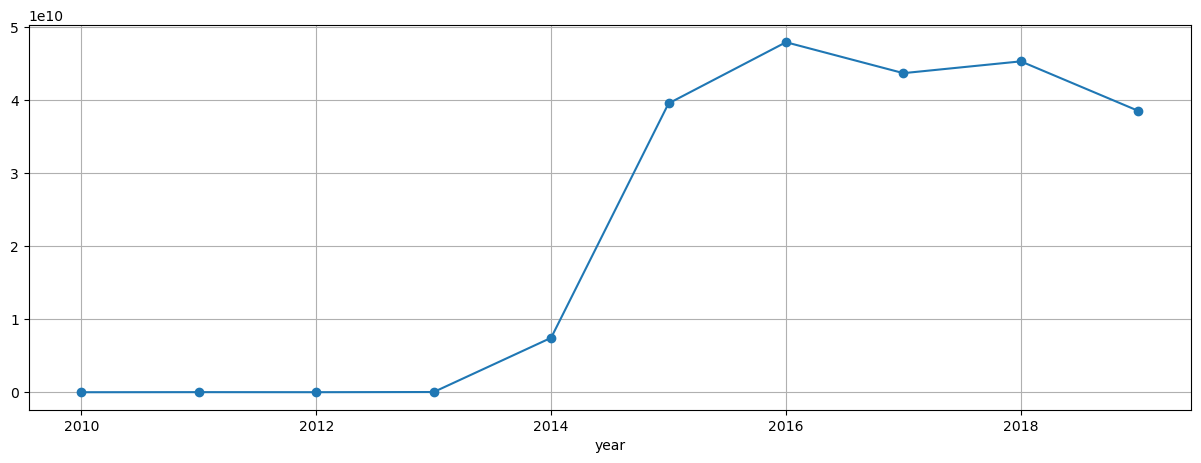

In [66]:
box_office_dont_nool.groupby('year')['box_office'].sum().plot(figsize=(15,5), style='o-', grid=True)

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [67]:
sum_sbor = box_office_dont_nool.pivot_table(index = ['year'], values = 'box_office', aggfunc = ['sum', 'mean', 'median'])\
    .sort_values(by = ('sum', 'box_office'), ascending = False)
sum_sbor['median/mean'] = sum_sbor['median', 'box_office'] / sum_sbor['mean', 'box_office']
sum_sbor

,sum,mean,median,median/mean
,box_office,box_office,box_office,
year,,,,
2016,47866299596,91173903.99,3915041.00,0.04
2018,45249165297,95261400.63,8751895.00,0.09
2017,43636537422,122231197.26,9919415.00,0.08
2015,39497365062,85492132.17,5003449.50,0.06
2019,38480558830,72604827.98,4547560.00,0.06
2014,7444951839,27270885.86,20400.00,0.00
2013,29799704,166478.79,3580.00,0.02
2011,14102765,129383.17,3000.00,0.02


In [68]:
sum_sbor['median/mean'].mean()

0.05636727854578488

* В среднем медиана составляет 0.06 от средних сборов фильм
* Возможно это связано с тем, что в каждом году были кассовые хиты и это сильно повлияло на среднее

* В среднем фильмы больше всего собирали в 2017 году - 136 032 793 руб.
* В среднем фильмы меньше всего собирали в 2010 году - 24 046 руб.

* Самая большая общая сумма проката фильмов была в 2018 году - 49 668 402 949 руб.
* Самая маленькая общая сумма проката фильмов была в 2010 году - 2 428 654 руб.

### Определяем, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год.

In [69]:
box_office_dont_nool['year'].value_counts()

year
2019    530
2016    525
2018    475
2015    462
2017    357
2014    273
2013    179
2012    123
2011    109
2010    101
Name: count, dtype: int64

In [70]:
year_2015_2019 = box_office_dont_nool[box_office_dont_nool['year'] > 2014]
year_2015_2019['year'].value_counts()

year
2019    530
2016    525
2018    475
2015    462
2017    357
Name: count, dtype: int64

In [71]:
year_2015_2019.pivot_table(index = ['age_restriction'], values = 'box_office', aggfunc = ['count', 'sum', 'mean', 'median'])\
    .sort_values(by = ('mean', 'box_office'), ascending = False)

,count,sum,mean,median
,box_office,box_office,box_office,box_office
age_restriction,,,,
«6+» - для детей старше 6 лет,317,50871440908,160477731.57,13717189
«12+» - для детей старше 12 лет,347,50979156540,146913995.79,4902848
«16+» - для детей старше 16 лет,803,71310636001,88805275.22,5600007
«18+» - запрещено для детей,792,40759615355,51464160.80,6154439
«0+» - для любой зрительской аудитории,90,809077403,8989748.92,2949626


* Фильмов с рейтингом «0+» значительно меньше чем фильмов любой другой категории (90), такая же ситуация с суммой сборов и сборами указанных фильмов в среднем.
* Возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) влияет на сборы фильма в прокате, чем ниже возрастной рейтинг, тем больше фильм соберет в прокате в среднем.
* При этом фильмов с возрастным рейтингом «16+» и «18+» выходит в прокат значительно больше чем фильмов с возрастным рейтингом «6+» и «12+».

year_2015_2019.pivot_table(index = ['year', 'age_restriction'], values = 'box_office', aggfunc = ['count', 'sum', 'mean', 'median'])\
    .sort_values(by = ('year'), ascending = False)

In [72]:
year_2019 = year_2015_2019[year_2015_2019['year'] == 2019]
year_2019_final = year_2019.pivot_table(index = ['age_restriction'], values = 'box_office', aggfunc = ['count', 'sum', 'mean', 'median'])\
    .sort_values(by = ('mean', 'box_office'), ascending = False)
year_2019_final

,count,sum,mean,median
,box_office,box_office,box_office,box_office
age_restriction,,,,
«6+» - для детей старше 6 лет,81,12852548618,158673439.73,12875350.00
«12+» - для детей старше 12 лет,85,7459146405,87754663.59,3402053.00
«18+» - запрещено для детей,183,10121796238,55310361.96,5603216.00
«16+» - для детей старше 16 лет,178,8029321503,45108547.77,3173685.50
«0+» - для любой зрительской аудитории,3,17746066,5915355.33,3885434.00


**Для фильмов вышедших в прокат в 2019 году закономерности теже**

* Фильмов с рейтингом «0+» значительно меньше чем фильмов любой другой категории (3), такая же ситуация с суммой сборов и сборами указанных фильмов в среднем.
* Возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) влияет на сборы фильма в прокате, чем ниже возрастной рейтинг, тем больше фильм соберет в прокате в среднем.
* При этом фильмов с возрастным рейтингом «16+» и «18+» выходит в прокат значительно больше чем фильмов с возрастным рейтингом «6+» и «12+».

In [73]:
year_2018 = year_2015_2019[year_2015_2019['year'] == 2018]
year_2018_final = year_2018.pivot_table(index = ['age_restriction'], values = 'box_office', aggfunc = ['count', 'sum', 'mean', 'median'])\
    .sort_values(by = ('mean', 'box_office'), ascending = False)
year_2018_final

,count,sum,mean,median
,box_office,box_office,box_office,box_office
age_restriction,,,,
«6+» - для детей старше 6 лет,68,10104974592,148602567.53,14688850
«12+» - для детей старше 12 лет,67,9848053984,146985880.36,8425367
«16+» - для детей старше 16 лет,156,16503602284,105792322.33,9010638
«18+» - запрещено для детей,179,8760085436,48939024.78,7179466
«0+» - для любой зрительской аудитории,5,32449001,6489800.20,3616937


**Для фильмов вышедших в прокат в 2018 году закономерности практически те же**

* Фильмов с рейтингом «0+» значительно меньше чем фильмов любой другой категории (5), такая же ситуация с суммой сборов и сборами указанных фильмов в среднем.
* В 2018 году фильмы с возрастным рейтингом «12+» в среднем собирали в прокате больше чем фильмы с возрастным рейтингом «16+»
* При этом фильмов с возрастным рейтингом «16+» и «18+» выходит в прокат значительно больше чем фильмов с возрастным рейтингом «6+» и «12+».

In [74]:
year_2017 = year_2015_2019[year_2015_2019['year'] == 2017]
year_2017_final = year_2017.pivot_table(index = ['age_restriction'], values = 'box_office', aggfunc = ['count', 'sum', 'mean', 'median'])\
    .sort_values(by = ('mean', 'box_office'), ascending = False)
year_2017_final

,count,sum,mean,median
,box_office,box_office,box_office,box_office
age_restriction,,,,
«12+» - для детей старше 12 лет,41,7851427659,191498235.59,9010548
«6+» - для детей старше 6 лет,45,7158972353,159088274.51,48557861
«16+» - для детей старше 16 лет,121,18745042899,154917709.91,9702077
«0+» - для любой зрительской аудитории,3,229598930,76532976.67,22178956
«18+» - запрещено для детей,147,9651495581,65656432.52,8212677


**Для фильмов вышедших в прокат в 2017**

* Фильмов с рейтингом «0+» значительно меньше чем фильмов любой другой категории (3), такаая же ситуация с суммой сборов, при этом фильмы с рейтингом «0+» в среднем собирали больше чем фильмы с рейтингом «18+».
* Возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) влияет на сборы фильма в прокате, чем ниже возрастной рейтинг, тем больше фильм соберет в прокате в среднем.
* При этом фильмов с возрастным рейтингом «16+» и «18+» выходит в прокат значительно больше чем фильмов с возрастным рейтингом «6+» и «12+».

In [75]:
year_2016 = year_2015_2019[year_2015_2019['year'] == 2016]
year_2016_final = year_2016.pivot_table(index = ['age_restriction'], values = 'box_office', aggfunc = ['count', 'sum', 'mean', 'median'])\
    .sort_values(by = ('mean', 'box_office'), ascending = False)
year_2016_final

,count,sum,mean,median
,box_office,box_office,box_office,box_office
age_restriction,,,,
«6+» - для детей старше 6 лет,70,12053145991,172187799.87,3026256
«12+» - для детей старше 12 лет,82,12204446503,148834713.45,4690635
«16+» - для детей старше 16 лет,181,16664548492,92069328.69,5180850
«18+» - запрещено для детей,151,6793929771,44992912.39,6107001
«0+» - для любой зрительской аудитории,41,150228839,3664118.02,2571294


**Для фильмов вышедших в прокат в 2016**

* Фильмов с рейтингом «0+» значительно меньше чем фильмов любой другой категории (40), такая же ситуация с суммой сборов и сборами указанных фильмов в среднем.
* Возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) влияет на сборы фильма в прокате, чем ниже возрастной рейтинг, тем больше фильм соберет в прокате в среднем.
* При этом фильмов с возрастным рейтингом «16+» и «18+» выходит в прокат значительно больше чем фильмов с возрастным рейтингом «6+» и «12+».

In [76]:
year_2015 = year_2015_2019[year_2015_2019['year'] == 2015]
year_2015_final = year_2015.pivot_table(index = ['age_restriction'], values = 'box_office', aggfunc = ['count', 'sum', 'mean', 'median'])\
    .sort_values(by = ('mean', 'box_office'), ascending = False)
year_2015_final

,count,sum,mean,median
,box_office,box_office,box_office,box_office
age_restriction,,,,
«12+» - для детей старше 12 лет,72,13616081989,189112249.85,15959668.00
«6+» - для детей старше 6 лет,53,8701799354,164184893.47,20380982.00
«16+» - для детей старше 16 лет,167,11368120823,68072579.78,4784781.00
«18+» - запрещено для детей,132,5432308329,41153850.98,4616614.50
«0+» - для любой зрительской аудитории,38,379054567,9975120.18,2949808.00


**Для фильмов вышедших в прокат в 2015**

* Фильмов с рейтингом «0+» значительно меньше чем фильмов любой другой категории (35), такая же ситуация с суммой сборов и сборами указанных фильмов в среднем.
* Возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) влияет на сборы фильма в прокате, чем ниже возрастной рейтинг, тем больше фильм соберет в прокате в среднем.
* При этом фильмов с возрастным рейтингом «16+» и «18+» выходит в прокат значительно больше чем фильмов с возрастным рейтингом «6+» и «12+».

* Картина в зависимости от года не меняется, закономерности теже самые.

**Исключения**
* 2017 год - Фильмов с рейтингом «0+» в среднем собирали в прокате больше чем фильмы с рейтингом «18+».
* 2015, 2016 год - Фильмов с рейтингом «0+» вышло 35 и 40 (практически столько же сколько фильмов с рейтингом «6+» (49, 68)


### Определяем самые популярные жанры.

In [77]:
box_office_dont_nool.pivot_table(index = ['general_genre'], values = 'box_office', aggfunc = ['count', 'sum', 'mean'])\
    .sort_values(by = ('count', 'box_office'), ascending = False)

,count,sum,mean
,box_office,box_office,box_office
general_genre,,,
драма,684,14710631933,21506771.83
комедия,370,19255390935,52041597.12
мультфильм,339,36959939244,109026369.45
ужасы,267,16624149847,62262733.51
unknown,245,8977870525,36644369.49
боевик,235,27598666276,117441133.09
триллер,217,7697874989,35474078.29
фантастика,175,46262334343,264356196.25


* Самый популярные жанры - драма (684 фильма), комедия (370 фильмов), мультфильм (339 фильмов)
* Самые непопулярные жанры - для взрослых,	реальное ТВ,	фильм-нуар, короткометражка (по 1 фильму)

## Исследование фильмов, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [78]:
film_with_support = df.query('refundable_support != 0 or nonrefundable_support != 0')
film_with_support = film_with_support.query('budget != 0') 
film_with_support.reset_index(drop=True, inplace=True)
film_with_support.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,general_director,general_genre,procent_support
0,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,26500000,79411900,Министерство культуры,8.10,"драма,мелодрама",365353,2013,А.Атанесян,драма,33.40
1,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857,Министерство культуры,0.00,unknown,28140,2014,А.Якимчук,unknown,70.00
2,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,107847945,176023490,Фонд кино,5.30,"комедия,фантастика",19957031,2013,Р.Давлетьяров,комедия,61.30
3,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,28000000,40574140,Министерство культуры,4.20,драма,55917,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.00
4,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,25000000,40015122,Министерство культуры,6.40,драма,232100,2014,М.Угаров,драма,62.50


### Cмотрим, сколько выделяют средств на поддержку кино. Проверяем, хорошо ли окупаются такие фильмы и какой у них рейтинг.

In [79]:
sup_df = film_with_support.pivot_table(index = ['year'], values = ['refundable_support', 'nonrefundable_support'], aggfunc = ['count', 'sum'])\
    .sort_values(by = ('year'), ascending = False)
sup_df

count                                      sum  \
     nonrefundable_support refundable_support nonrefundable_support   
year                                                                  
2019                    69                 69            3856000000   
2018                    52                 52            2506000000   
2017                    39                 39            2424624781   
2016                    58                 58            3074655482   
2015                    80                 80            2680088340   
2014                    15                 15             478002299   
2013                     2                  2             134347945   

                         
     refundable_support  
year                     
2019          868000000  
2018          592000000  
2017          674346881  
2016          902500000  
2015          547153119  
2014           71000000  
2013                  0

In [80]:
sup_df['sum', 'nonrefundable_support'].sum() + sup_df['sum', 'refundable_support'].sum()

18808718847

* Общая сумма средств направленная на поддержку кино - 18 808 718 847 руб.
* Объем средств направляемых на поддержку кино рос с 2013 - 2016, в 2017 произошло резкое падение объема средств направляемых на поддержку кино. С 2017 объем средств направляемых на поддержку кино снова растет. 

In [81]:
box_office_df = film_with_support
box_office_df['sum_support'] = box_office_df['nonrefundable_support'] + box_office_df['refundable_support'] 
box_office_df_year = box_office_df.pivot_table(index = ['year'], values = ['sum_support', 'budget', 'box_office'], aggfunc = ['mean'])\
    .sort_values(by = ('year'), ascending = False)
box_office_df_year['s_s\b_o'] = box_office_df_year['mean', 'budget'] / box_office_df_year['mean', 'box_office']
box_office_df_year

mean                          s_s_o
       box_office       budget sum_support       
year                                             
2019  44072003.84 117250850.12 68463768.12   2.66
2018  98046530.90 127917204.50 59576923.08   1.30
2017 149547321.67 178773655.59 79460811.85   1.20
2016  85478006.03 124636943.93 68571646.24   1.46
2015  60196842.52  91370865.09 40340518.24   1.52
2014  67145876.47  85298985.53 36600153.27   1.27
2013  10161192.00 127717695.00 67173972.50  12.57

* Тенденция заключается в том, что фильмы которым оказывалась государственная поддержка в среднем не окупаются. Исключение 2017 и 2018 год.
* Также необходимо отметить, что в 2017 и в 2018 году, произошло резкое уменьшение объема государственной поддержки (относительно 2016).
* Самая высокая окупаемость была в 2017 году (0.65). в 2018 году объем государственной поддержки относительно 2017 года немного увеличился, при этом окупаемость упала (0.70)

In [82]:
df['ratings'].mean()

5.649652592196686

In [83]:
film_with_support['ratings'].mean()

5.749206349206349

In [84]:
film_with_support.pivot_table(index = ['year'], values = ['ratings'], aggfunc = ['mean'])\
    .sort_values(by = ('year'), ascending = False)

,mean
,ratings
year,
2019,5.91
2018,5.81
2017,5.74
2016,5.30
2015,5.91
2014,5.57
2013,6.70


* Рейтинг фильмов с господдержкой в среднем немного выше рейтинга остальных фильмов (на 0.10).
* С 2016 есть тенденция к росту рейтинга фильмов с господдержкой.

### Строим корелляционную матрицу

In [85]:
film_with_support.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  315 non-null    object             
 1   puNumber               315 non-null    int32              
 2   show_start_date        315 non-null    datetime64[ns, UTC]
 3   type                   315 non-null    object             
 4   film_studio            315 non-null    object             
 5   production_country     315 non-null    object             
 6   director               315 non-null    object             
 7   producer               315 non-null    object             
 8   age_restriction        315 non-null    object             
 9   refundable_support     315 non-null    int32              
 10  nonrefundable_support  315 non-null    int32              
 11  budget                 315 non-null    int32              

In [86]:
numeric_columns = ['show_start_date', 'refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office', 'year', 'procent_support', 'sum_support']

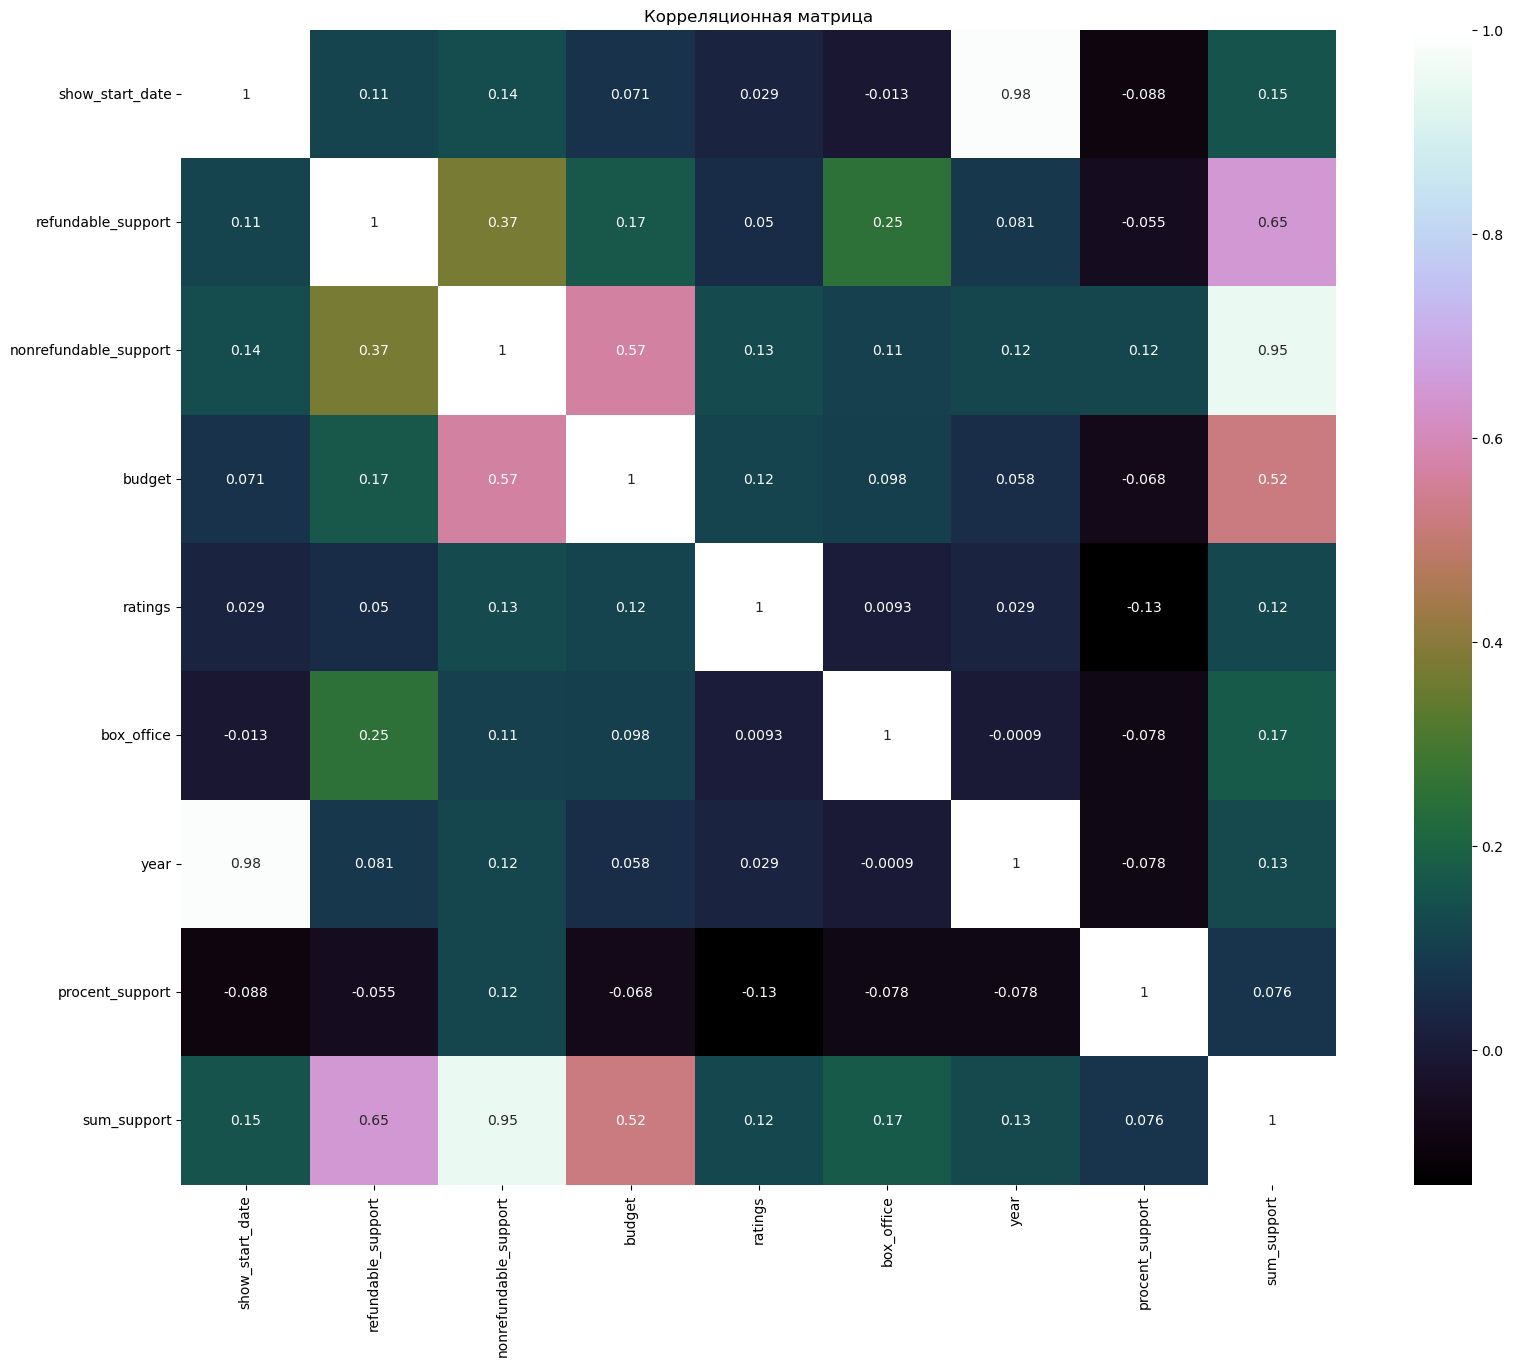

In [87]:
correlation_fws = film_with_support[numeric_columns].corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation_fws, vmax=1, square=True, annot=True, cmap='cubehelix')

plt.title('Корреляционная матрица')
plt.show()

**Корелляция пар в соответствии со шкалой Чеддока**
* Слабая корелляция - сборы в рублях \ рейтинг фильма на КиноПоиске, объём возвратных средств государственной поддержки \ рейтинг фильма на КиноПоиске, объём невозвратных средств государственной поддержки \ рейтинг фильма на КиноПоиске 
* Умеренная корелляция - объём возвратных средств государственной поддержки \ сборы в рублях, объём невозвратных средств государственной поддержки \ сборы в рублях, бюджет \ сборы в рублях 
* Заметная корелляция - нет 


### Ищем закономерности в зависимости от источника господдержки

In [88]:
film_with_support.pivot_table(index = ['financing_source'], values = 'ratings', aggfunc = ['count', 'mean'])\
    .sort_values(by = ('count', 'ratings'), ascending = False)

,count,mean
,ratings,ratings
financing_source,,
Министерство культуры,163,5.75
Фонд кино,131,5.69
"Министерство культуры, Фонд кино",21,6.12


In [89]:
film_with_support.pivot_table(index = ['financing_source'], values = 'box_office', aggfunc = ['count', 'mean'])\
    .sort_values(by = ('count', 'box_office'), ascending = False)

,count,mean
,box_office,box_office
financing_source,,
Министерство культуры,163,32556167.84
Фонд кино,131,142526381.27
"Министерство культуры, Фонд кино",21,37862114.10


* Министерство культуры и Фонд кино оказывают поддержку примерно одинаковому колличеству фильмов.   
* При этом фильмы, которым оказывал поддержку Фонд кино, в среднем собирают в кинотеатрах значительно больше денег.

### Смотрим какая доля в общем прокате фильмов произведенных в РФ

In [90]:
box_office_dont_nool['production_country'].unique()

array(['СССР', 'Россия, Казахстан, США',
       'СССР, ЧССР, Западный Берлин, ПНР', 'США - Великобритания', 'США',
       'США-Канада', 'СССР, Финляндия', 'Великобритания',
       'Канада-Франция', 'СССР - Швейцария - Франция', 'Россия',
       'Великобритания - Франция', 'Южная Корея', 'Франция', 'Япония',
       'Германия', 'Франция-Бельгия', 'США-ЮАР',
       'Великобритания-Австралия - США', 'Южная Корея - США',
       'Франция - Германия', 'США - Новая Зеландия', 'США - КНР',
       'Канада', 'Дания', 'США - Канада', 'Франция - Бельгия',
       'Нидерланды', 'Франция - Бельгия - Люксембург',
       'Великобритания - Норвегия - Дания - Германия', 'Италия',
       'Нидерланды - Россия - Германия', 'КНР', 'Канада - Южная Корея',
       'Великобритания - Польша - КНР - Индия - Норвегия',
       'Мексика - Аргентина - Великобритания',
       'Польша - Португалия - Франция - Великобритания', 'США - Индия',
       'Испания', 'Япония - Канада',
       'Финляндия - Дания - Германия - Ирлан

In [91]:
def country_category(row):
    if row == 'Россия':
        return 'Россия'
    else:
        return 'Другая страна'

In [92]:
def country_group(group):
    group = group.split('-')
    for i in group:
        return i

In [93]:
film_country_category = box_office_dont_nool
film_country_category['country_category'] = film_country_category['production_country'].apply(generals_director_and_genres)
#film_country_category['country_category'].unique()

In [94]:
film_country_category['country_category'] = film_country_category['country_category'].apply(country_group)
#film_country_category['country_category'].unique()

In [95]:
film_country_category['country_category'] = film_country_category['country_category'].apply(generals_director_and_genres)
#film_country_category['country_category'].unique()

In [96]:
film_country_category['country_category'] = film_country_category['country_category'].str.replace(' ', '')
#film_country_category['country_category'].unique()

In [97]:
film_country_category['country_category'] = film_country_category['country_category'].apply(country_category)

In [98]:
film_country_category['country_category'].value_counts()

country_category
Другая страна    2319
Россия            815
Name: count, dtype: int64

In [99]:
film_country_category.pivot_table(index = ['year', 'country_category'], values = 'box_office', aggfunc = ['count', 'mean'])\
    .sort_values(by = ('year'), ascending = False)

count         mean
                      box_office   box_office
year country_category                        
2019 Россия                  110  55276116.84
     Другая страна           420  77143299.95
2018 Россия                  117  77702385.44
     Другая страна           358 100999961.46
2017 Россия                   55 118311051.04
     Другая страна           302 122945131.18
2016 Россия                  137  54445917.18
     Другая страна           388 104142291.09
2015 Россия                  145  47760113.50
     Другая страна           317 102751257.43
2014 Россия                   76  24079634.83
     Другая страна           197  28502028.39
2013 Россия                   49    470548.12
     Другая страна           130     51868.05
2012 Россия                   36     28907.03
     Другая страна            87     67985.86
2011 Россия                   45      9699.67
     Другая страна            64    213535.62
2010 Россия                   45      5886.64
     Другая страна            56     38638.48

## Общий вывод

**Текущие тренды российского кинопроката**

* С 2010 года есть тенденция к росту количества фильмов выходящих в прокат.
* С 2010 года по 2018 год есть тенденция к росту суммы сборов фильмов выходящих в прокат.
* Фильмов с рейтингом «0+» значительно меньше чем фильмов любой другой категории (90), такая же ситуация с суммой сборов и сборами указанных фильмов в среднем.
* Возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) влияет на сборы фильма в прокате, чем ниже возрастной рейтинг, тем больше фильм соберет в прокате в среднем.
* При этом фильмов с возрастным рейтингом «16+» и «18+» выходит в прокат значительно больше чем фильмов с возрастным рейтингом «6+» и «12+
* Самый популярные жанры - драма (684 фильма), комедия (370 фильмов), мультфильм (339 фильмов)
* Самые непопулярные жанры - для взрослых, реальное ТВ, фильм-нуар, короткометражка (по 1 фильму)

**Фильмы, которые получили государственную поддержку**

* Общая сумма средств направленная на поддержку кино - 18 808 718 847 руб.
* Объем средств направляемых на поддержку кино рос с 2013 - 2016, в 2017 произошло резкое падение объема средств направляемых на поддержку кино. С 2017 объем средств направляемых на поддержку кино снова растет.
* Фильмы которым оказывалась государственная поддержка в среднем не окупаются. Исключение 2017 и 2018 год.
* Также необходимо отметить, что в 2017 и в 2018 году, произошло резкое уменьшение объема государственной поддержки (относительно 2016).
* Самая высокая окупаемость была в 2017 году (0.65). в 2018 году объем государственной поддержки относительно 2017 года немного увеличился, при этом окупаемость упала (0.70)
* Министерство культуры и Фонд кино оказывают поддержку примерно одинаковому колличеству фильмов.
* При этом фильмы, которым оказывал поддержку Фонд кино, в среднем собирают в кинотеатрах значительно больше денег.
* С 2016 есть тенденция к росту рейтинга фильмов с господдержкой.